In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Toy():
    def __init__(self, N=10):
        self.N = N
        self.s = 0
        self.opt_solution = [i for i in range(N)]
        self.all_state_action_pairs = [[(s, -1), (s, -1)] for s in range(N)]
        self.steps_taken = 0
        
    def step(self, action):
        if action != -1 and action != 1:
            raise ValueError('invalid action')
        self.steps_taken += 1
        self.s += action
        self.s = np.clip(self.s, 0, self.N-1)
        if self.s == self.N-1:
            r = 1
            d = True
        else:
            r = 0
            d = False
        return self.s, r, d
    
    def reset(self):
        self.s = 0
        self.steps_taken = 0
        return self.s

In [3]:
def check_opt(N, all_states):
    opt_solution = [i for i in range(N)]
    if len(all_states) > N:
        check_opt = all_states[-N:]
        if opt_solution == check_opt:
            return True
        return False

def check_all(N, collected_state_action_pairs):
    all_state_action_pairs = [(s, a) for s in range(N) for a in [1, -1]]
    for s in all_state_action_pairs:
        if s not in collected_state_action_pairs:
            return False
    return True

def check_solution(N, all_states):
    if N-1 in all_states:
        return True
    else:
        return False

In [4]:
def run(N=[10, 20, 30]):
    all_state_action_pairs_steps = []
    non_optimal_solution_steps = []
    optimal_solution_steps = []
    for n in N:
        env = Toy(N=n)
        s = env.reset()
        all_states = []
        all_state_action_pairs = []
        i = 0
        opt_i = np.inf
        all_i = np.inf
        solution_i = np.inf
        while i < 100000:
            action = np.random.choice([1, -1])
            all_state_action_pairs.append((s, action))
            s, _, _ = env.step(action)
            all_states.append(s)
            i += 1
            opt = check_opt(n, all_states)
            al = check_all(n, all_state_action_pairs)
            solution = check_solution(n, all_states)
            if opt:
                #print('optimation solution is found: {} steps taken'.format(i))
                if i < opt_i:
                    opt_i = i
            if al:
                #print('all state action pairs are found: {} steps taken'.format(i))
                if i < all_i:
                    all_i = i
            if solution:
                #print('non optimal solution is found: {} steps taken'.format(i))
                if i < solution_i:
                    solution_i = i
            if opt and al and solution:
                break
        all_state_action_pairs_steps.append(all_i)
        non_optimal_solution_steps.append(solution_i)
        optimal_solution_steps.append(opt_i)
    return all_state_action_pairs_steps, non_optimal_solution_steps, optimal_solution_steps

In [5]:
N = [5,6,7,8,9,10,15]

In [6]:
sa = []
nos = []
oss = []

In [23]:
all_state_action_pairs_steps, non_optimal_solution_steps, optimal_solution_steps = run(N)

In [24]:
sa.append(all_state_action_pairs_steps)

In [25]:
nos.append(non_optimal_solution_steps)

In [26]:
oss.append(optimal_solution_steps)

In [27]:
import matplotlib

In [91]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 50}

matplotlib.rc('font', **font)

In [92]:
plt.style.use('seaborn')

<ipython-input-92-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'steps taken')

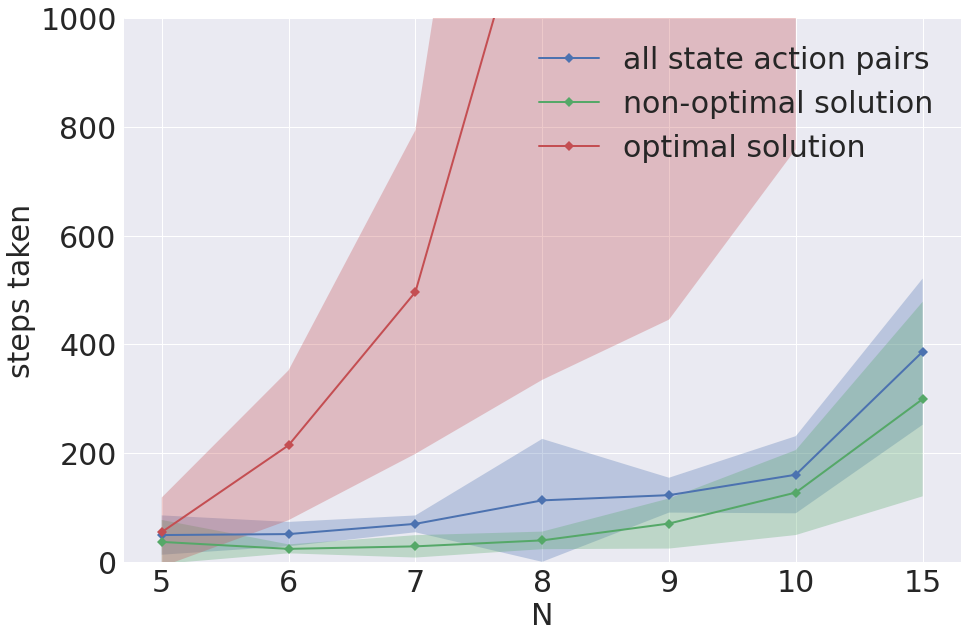

In [124]:
plt.figure(figsize=(15, 10))
plt.plot(np.mean(sa, axis=0), label='all state action pairs', marker='D', linewidth=2)
plt.fill_between(x=[i for i in range(len(N))], y1=np.mean(sa, axis=0)+np.std(sa, axis=0), y2=np.mean(sa, axis=0)-np.std(sa, axis=0), alpha=0.3)

plt.plot(np.mean(nos, axis=0), label='non-optimal solution', marker='D', linewidth=2)
plt.fill_between(x=[i for i in range(len(N))], y1=np.mean(nos, axis=0)+np.std(nos, axis=0), y2=np.mean(nos, axis=0)-np.std(nos, axis=0), alpha=0.3)

plt.plot(np.mean(oss, axis=0), label='optimal solution', marker='D', linewidth=2)
plt.fill_between(x=[i for i in range(len(N))], y1=np.mean(oss, axis=0)+np.std(oss, axis=0), y2=np.mean(oss, axis=0)-np.std(oss, axis=0), alpha=0.3)
plt.ylim(0, 1000)
plt.yticks(fontsize=30)

plt.xticks([i for i in range(len(N))], N, fontsize=30, fontweight='normal')
plt.legend(fontsize=30)
plt.xlabel('N', fontsize=30, fontweight='normal')
plt.ylabel('steps taken', fontsize=30, fontweight='normal')